In [2]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')




In [3]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [4]:
df=pd.read_csv(r"https://github.com/ajayShankar322/DSA_project_football_analysis/blob/main/football_data.csv")
df.set_index("R",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         50 non-null     object 
 1   Name           50 non-null     object 
 2   Club           50 non-null     object 
 3   Age            50 non-null     object 
 4   Main position  50 non-null     object 
 5   Apps           50 non-null     int64  
 6   Mins           50 non-null     int64  
 7   Goals          50 non-null     int64  
 8   Assists        50 non-null     int64  
 9   Shot per Game  50 non-null     float64
 10  Key Pass       50 non-null     float64
 11  Drb            50 non-null     float64
 12  Fouled         50 non-null     float64
 13  Rating         50 non-null     float64
dtypes: float64(5), int64(4), object(5)
memory usage: 5.9+ KB


Dataset info

In [5]:
df.head()

,Player,Name,Club,Age,Main position,Apps,Mins,Goals,Assists,Shot per Game,Key Pass,Drb,Fouled,Rating
R,,,,,,,,,,,,,,
1,Lionel Messi,Messi,Barcelona,32,FW,21,1891,19,12,4.8,2.5,5.4,1.7,8.61
2,Cristiano Ronaldo,Ronaldo,Juventus,35,FW,22,1945,29,13,5.9,1.7,1.8,1.9,7.90
3,Robert Lewandowski,Lewandowski,Bayern Munich,31,FW,23,2042,25,3,4.7,1.2,2.1,1.5,8.16
4,Kylian Mbappé,Mbappé,Paris Saint-Germain,21,FW,17,1516,18,5,4.4,2.0,2.8,1.1,8.14
5,Josip Ilicic,Ilicic,Atalanta,32,FW,19,1492,15,5,3.6,2.5,2.6,2.4,7.95




Scatter Plot of Goals VS Assists of Top Players


In [6]:
fig = px.scatter(df,x="Assists",y="Goals",color="Player",text="Name",title="Goals Vs Assists")
fig.update_traces(textposition='top center')
fig.show()



3D plot for Drbbile, Key Pass and Shot per Game


In [7]:
fig = px.scatter_3d(df,x="Drb",y="Key Pass",z="Shot per Game",color="Player",text="Name",
                    title="Dribbling PerG VS Key Pass PerG VS Shot per Game")
fig.update_traces(textposition='top center')
figsize=(18,8)
fig.show()


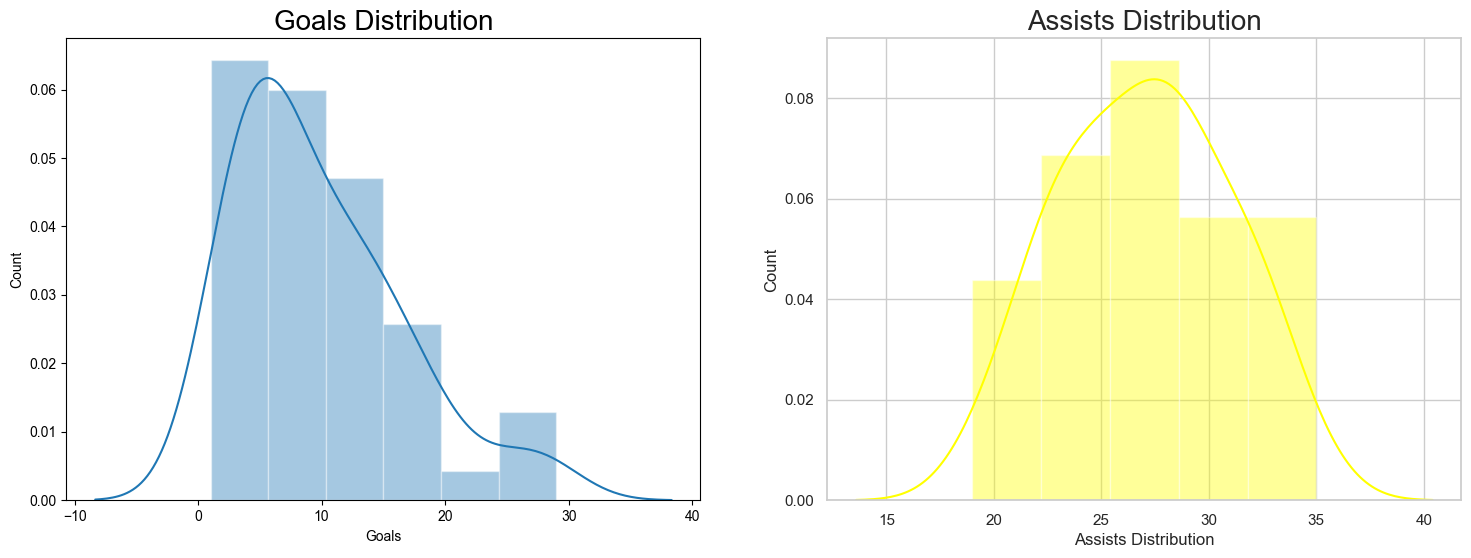

In [8]:


plt.rcParams['figure.figsize'] = (18, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Goals'])
plt.title('Goals Distribution', fontsize = 20)
plt.xlabel('Goals')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'yellow')
plt.title('Assists Distribution', fontsize = 20)
plt.xlabel('Assists Distribution')
plt.ylabel('Count')
plt.show()



K-Mean Algorithm for clustering player on the basis of Goals and Assists

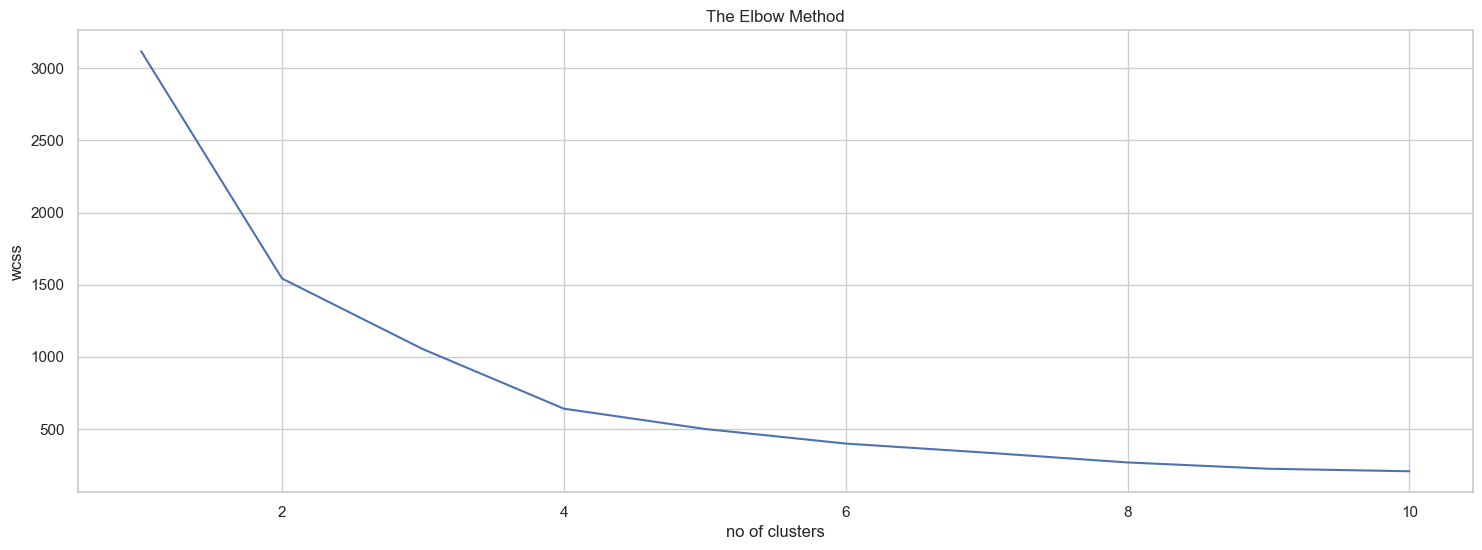

In [9]:
X= df.iloc[:, [8,7]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)     
plt.plot(range(1,11), wcss,)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show() 

In [10]:
kmeansmodel = KMeans(n_clusters=6 , init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
labels = kmeansmodel.labels_
df["label"]=labels
df.loc[df['label'] == 5, 'Category'] = 'good season'
df.loc[df['label'] == 4, 'Category'] = 'Midfield Maestro'
df.loc[df['label'] == 3, 'Category'] = 'POTS nominees'
df.loc[df['label'] == 2, 'Category'] = 'Bad Season'
df.loc[df['label'] == 1, 'Category'] = 'Match winners'
df.loc[df['label'] == 0, 'Category'] = 'contributer'




Scatter plot of clusters


In [11]:
fig = px.scatter(df,x="Assists",y="Goals",color="Category",text="Name",title="K-mean clustering of Assists VS Goals")
fig.update_traces(textposition='top center')
fig.show()


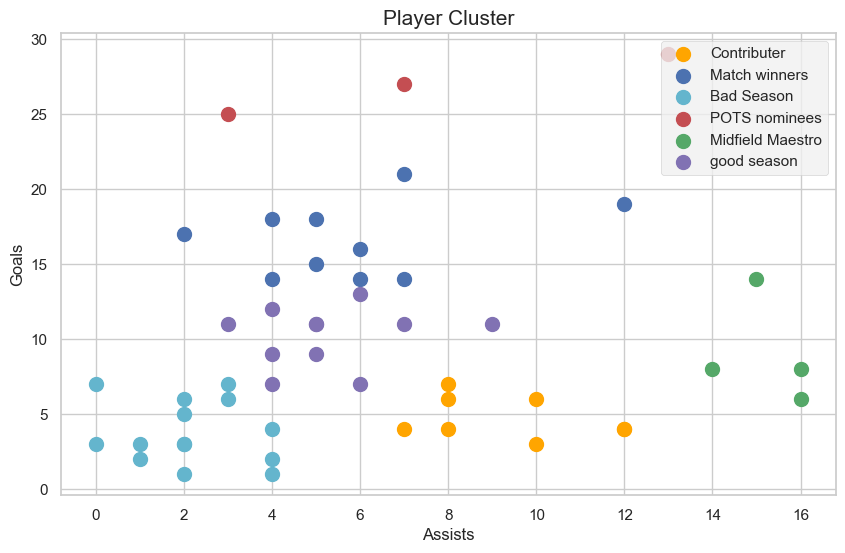

In [12]:
fig=plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Contributer')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'b', label = 'Match winners')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'c', label = 'Bad Season')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'r', label = 'POTS nominees')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'g', label = 'Midfield Maestro')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'm', label = 'good season')
plt.style.use('fivethirtyeight')
plt.title('Player Cluster', fontsize = 15)
plt.xlabel('Assists')
plt.ylabel('Goals')
plt.legend()